# СРАВНИТЕЛЬНАЯ ГЕНОМИКА

***

# Практика 2. Частоты аллелей и генотипов

###  Содержание

1. [Словарик](#1.-Словарик)
2. [Аллели и генотипы](#2.-Аллели-и-генотипы)
3. [Принцип Харди-Вайнберга](#3.-Принцип-Харди-Вайнберга)    
   [**ЗАДАНИЕ 2.1**](#ЗАДАНИЕ-2.1)    
4. [Проверка Принципа Харди-Вайнберга (симулякры)](#4.-Проверка-Принципа-Харди-Вайнберга-(симулякры))
5. [Подсчёт аллелей на реальных данных](#5.-Подсчёт-аллелей-на-реальных-данных)
6. [Хи-квадрат тест на значимость отклонения от ПХВ](#6.-Хи-квадрат-тест-на-значимость-отклонения-от-ПХВ)   
   [**ЗАДАНИЕ 2.2**](#ЗАДАНИЕ-2.2)  
7. [Проверяем ПХВ на геномных данных](#7.-Проверяем-ПХВ-на-геномных-данных)    
   [**ЗАДАНИЕ 2.3**](#ЗАДАНИЕ-2.3)  

## 1. Словарик

**Аллель** - генетический вариант (мутация)   
**Гаплоид** - особь с одним набором хромосом   
**Гетерозигота** - особь с двумя разными аллелями одного локуса (гена)   
**Генотип** - набор всех аллелей у одной особи   
**Генофонд** - набор всех аллелей в популяции   
**Гомозигота** - особь с двумя одинаковыми аллелями одного локуса (гена)   
**Диплоид** - особь с двумя наборами хромосом   
**Локус** - место расположения аллеля на хромосоме   
**Фенотип** - набор морфологических характеристик одной особи   


___

## 2. Аллели и генотипы

<img src="Images/IMG_4274.jpeg" width ="450" height="600" style="float:left"/>

Сколько особей вероятно может иметь тот или иной аллель?   
С какой вероятностью у особи может возникнуть вредная мутация?   
С какой вероятностью в популяции может появиться тот или иной генотип?   

In [1]:
# Частота аллеля A
p <- 0.5
p

[1] 0.5

In [2]:
# Частота генотипа AA
p^2

[1] 0.25

In [3]:
# Допустим мутантный признак встречается в популяции с частотой 1/1000, 
# обусловленный гомозиготой рецессивных аллелей,
# то частота генотипа (аа) в популяции будет равна
f <- 1/1000
# а частота рецессивного аллеля в популяции
sqrt(f)
# другими словами это вероятность наследования этого гена

[1] 0.03162278

**Какова вероятность носителей мутантного аллеля в популяции?**

In [4]:
# Частота нормального аллеля 
p = 1-sqrt(f)
p

[1] 0.9683772

In [5]:
# Частота гетерозигот Aa --- p(1-p)+p(1-p)
2*p*(1-p)

[1] 0.06124555

In [6]:
# Складываем вероятности генотипов, чтобы получить частоту носителей и гомозигот мутантного аллеля
f + 2*p*(1-p)

[1] 0.06224555

___

## 3. Принцип Харди-Вайнберга

In [7]:
# Общая частота всех генотипов равна единице
p^2 + 2*p*(1-p) + (1-p)^2

[1] 1

#### Допущения модели ПХВ

* организм диплоидный
* организм размножается исключительно половым путём
* перемешивание гамет (аллелей) совершенно произвольное
* у популяции нет структуры - каждая особь имеет свободный доступ к другой, т.е. отсутствует миграция
* размер популяции безграничный
* нет влияния естественного отбора
* нет новых мутаций
* поколения дискретны и не перемешиваются

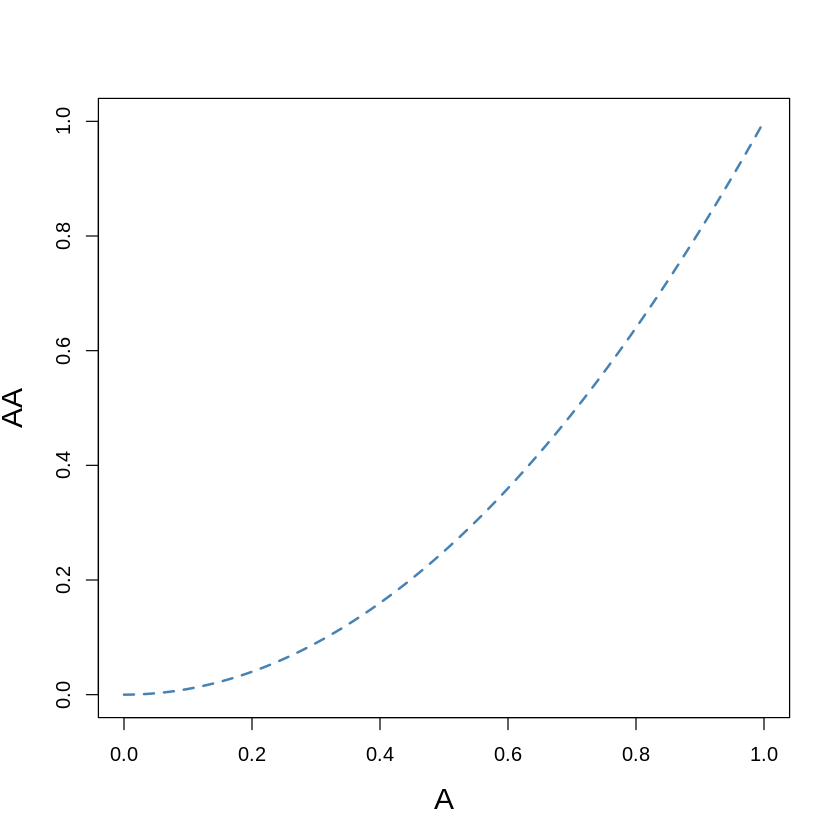

In [8]:
# зависимость между частотами генотипов и аллелей у гомозигот
curve(x^2, from = 0, to = 1, xlab = "A", ylab = "AA", lty = 2, lwd=2, cex.lab=1.5, col='steelblue')

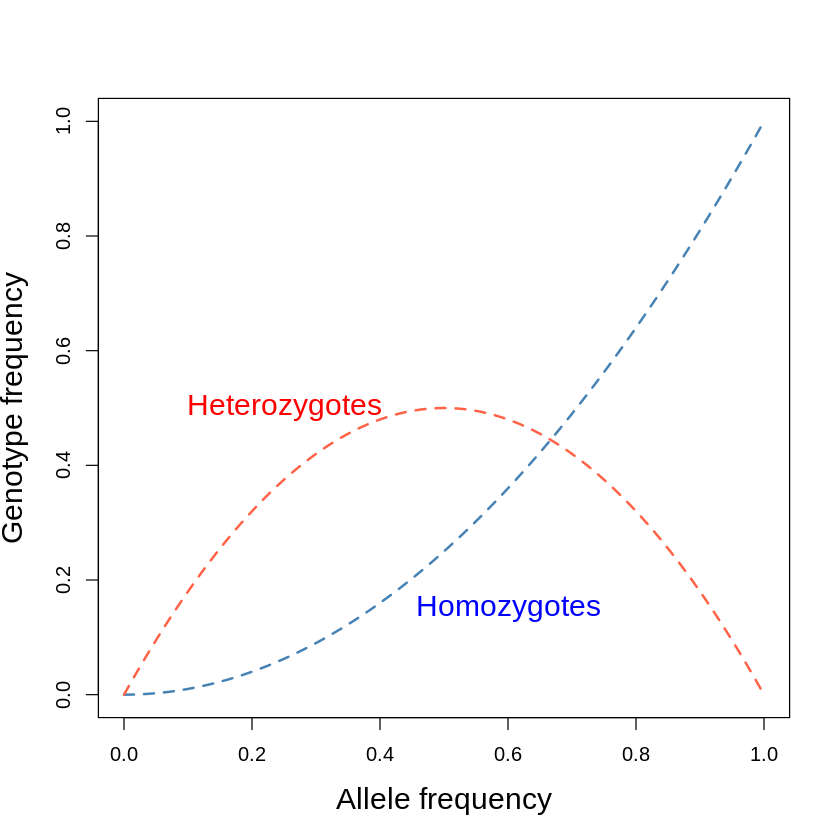

In [9]:
# зависимость между частотами генотипов и аллелей у гомозигот и гетерозигот
curve(x^2, from = 0, to = 1, xlab = "Allele frequency", ylab = "Genotype frequency", lty = 2, 
      lwd=2, cex.lab=1.5, col='steelblue', xlim=c(0,1), ylim=c(0,1))
curve(2*x*(1-x), from = 0, to = 1, add=TRUE, xlab = "", ylab = "", lty = 2, 
      lwd=2, cex.lab=1.5, col='tomato', xlim=c(0,1), ylim=c(0,1))
text(0.25, 0.5, "Heterozygotes", col = 'red', cex=1.5)
text(0.6, 0.15, "Homozygotes", col = 'blue', cex=1.5)

### ЗАДАНИЕ 2.1

1. Вычислите точку, в которой частота гомозигот и гетерозигот совпадут
2. Нарисуйте эту точку равновесия на графике, используя команду *points*

Используйте справку *help(points)* для получения  информации по команде

### Ответ:

In [35]:
x <- 2/3
y <- x^2

In [36]:
# проверьте ваш ответ, вставив правильное значение вместо вопросов
p <- x
all.equal(p^2,2*p*(1-p))

[1] TRUE

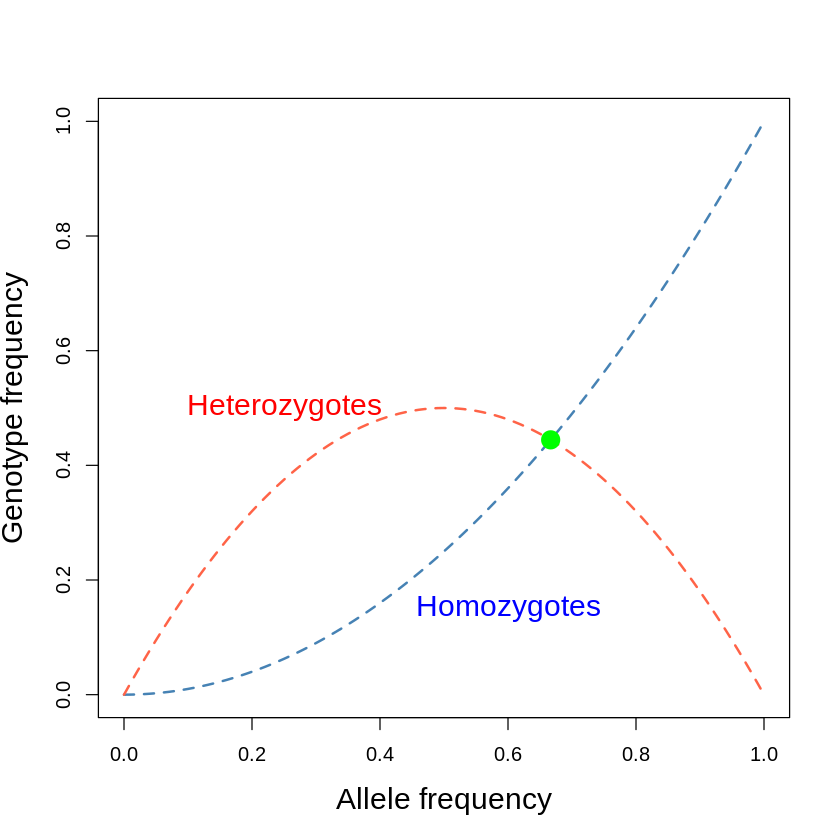

In [42]:
# Повторите график с точкой равновесия
curve(x^2, from = 0, to = 1, xlab = "Allele frequency", ylab = "Genotype frequency", lty = 2, 
      lwd=2, cex.lab=1.5, col='steelblue', xlim=c(0,1), ylim=c(0,1))
curve(2*x*(1-x), from = 0, to = 1, add=TRUE, xlab = "", ylab = "", lty = 2, 
      lwd=2, cex.lab=1.5, col='tomato', xlim=c(0,1), ylim=c(0,1))
text(0.25, 0.5, "Heterozygotes", col = 'red', cex=1.5)
text(0.6, 0.15, "Homozygotes", col = 'blue', cex=1.5)
points(p,p^2,cex=3,pch=20,col='green')

***

## 4. Проверка Принципа Харди-Вайнберга (симулякры)

In [43]:
# Создадим условный набор аллелей в популяции (т.е. ГЕНОФОНД)
alleles <- c(rep("A", 200), rep("a",800))
alleles

[1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [19] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [37] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [55] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [73] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
  [91] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [109] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [127] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [145] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [163] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [181] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [199] "A" "A" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [217] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [235] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [253] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [271] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [289] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [307] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [325] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [343] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [361] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [379] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [397] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [415] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [433] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [451] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [469] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [487] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [505] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [523] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [541] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [559] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [577] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [595] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [613] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [631] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [649] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [667] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [685] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [703] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [721] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [739] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [757] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [775] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [793] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [811] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [829] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [847] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [865] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [883] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [901] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a

In [44]:
# Проверим частоты аллелей
table(alleles)/length(alleles)

alleles
  a   A 
0.8 0.2 

In [45]:
# Для сравнения создадим произвольный набор аллелей
Ralleles <- sample(c("A","a"),1000,replace=TRUE)

In [46]:
# Проверим заодно и их частоты
table(Ralleles)/length(Ralleles)

Ralleles
    a     A 
0.523 0.477 

In [47]:
# Итак, допустим, что размер популяции равен тысяче особей
N = 1000

In [48]:
# Создадим матрицу всех особей в популяции
POPMAT <- matrix(nrow=N, ncol=2)
nrow(POPMAT)

[1] 1000

In [49]:
# Для каждой особи в популяции посчитаем генотип из общего генофонда
for(i in 1:N){
    POPMAT[i,1] <- sample(alleles,1)
    POPMAT[i,2] <- sample(alleles,1)
}
POPMAT

a,a
a,a
a,a
a,a
A,a
a,a
a,a
A,A
a,a
a,a
A,A


In [50]:
#Посчитаем число А аллелей
ALECOUNT <- sum(POPMAT=='A') 
ALECOUNT

[1] 387

In [51]:
# Посчитаем частоту А аллелей в популяции
ALEFREQ <- ALECOUNT/(N*2)
ALEFREQ

[1] 0.1935

In [52]:
# Посчитаем частоты генотипов
genotypes <- apply(POPMAT,1, function(x)paste(sort(x,decreasing=TRUE),collapse="/"))
GENCOUNT <- table(genotypes)
GENFREQ <- GENCOUNT[sort(names(GENCOUNT),decreasing=TRUE)]/N
GENFREQ

genotypes
  A/A   A/a   a/a 
0.040 0.307 0.653 

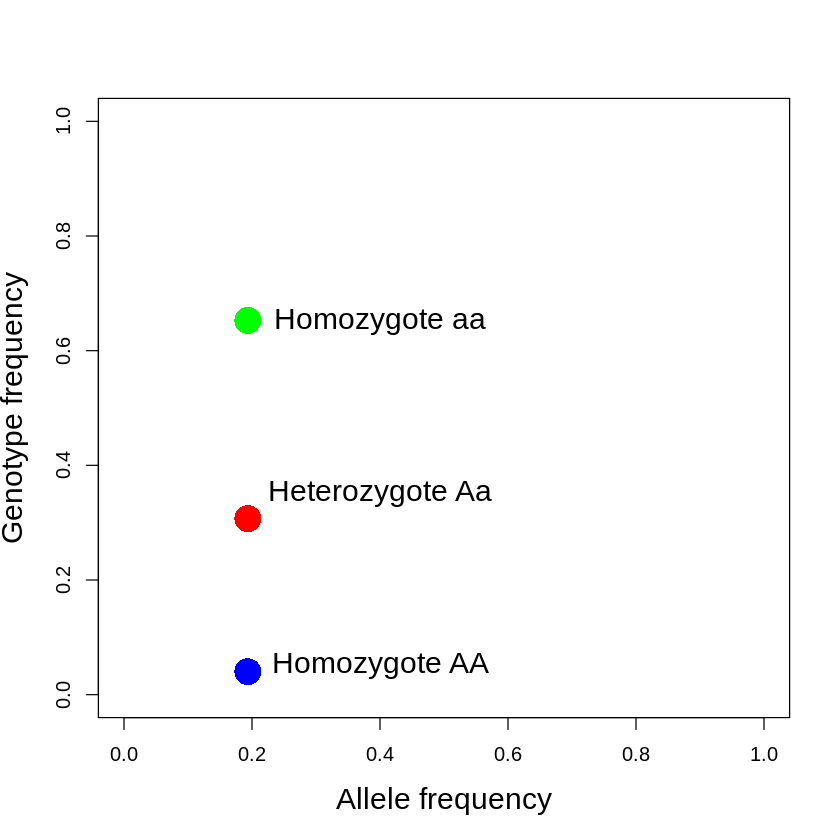

In [53]:
# Покажем на графике частоты генотипов для A аллеля

plot(ALEFREQ, GENFREQ["A/a"], xlab="Allele frequency", 
     ylab="Genotype frequency", ylim=c(0, 1), xlim=c(0, 1), col="red", pch=16, cex=3, cex.lab=1.5)

par(new=TRUE)

plot(ALEFREQ, GENFREQ["A/A"], axes=FALSE, xlab="", 
     ylab="", ylim=c(0, 1), xlim=c(0, 1), col="blue", pch=16, cex=3, cex.lab=1.5)

par(new=TRUE)

plot(ALEFREQ, GENFREQ["a/a"], axes=FALSE, xlab="", 
     ylab="", ylim=c(0, 1), xlim=c(0, 1), col="green", pch=16, cex=3, cex.lab=1.5)

text(0.4, 0.65, label="Homozygote aa", cex=1.5)
text(0.4, 0.35, label="Heterozygote Aa", cex=1.5)
text(0.4, 0.05, label="Homozygote AA", cex=1.5)

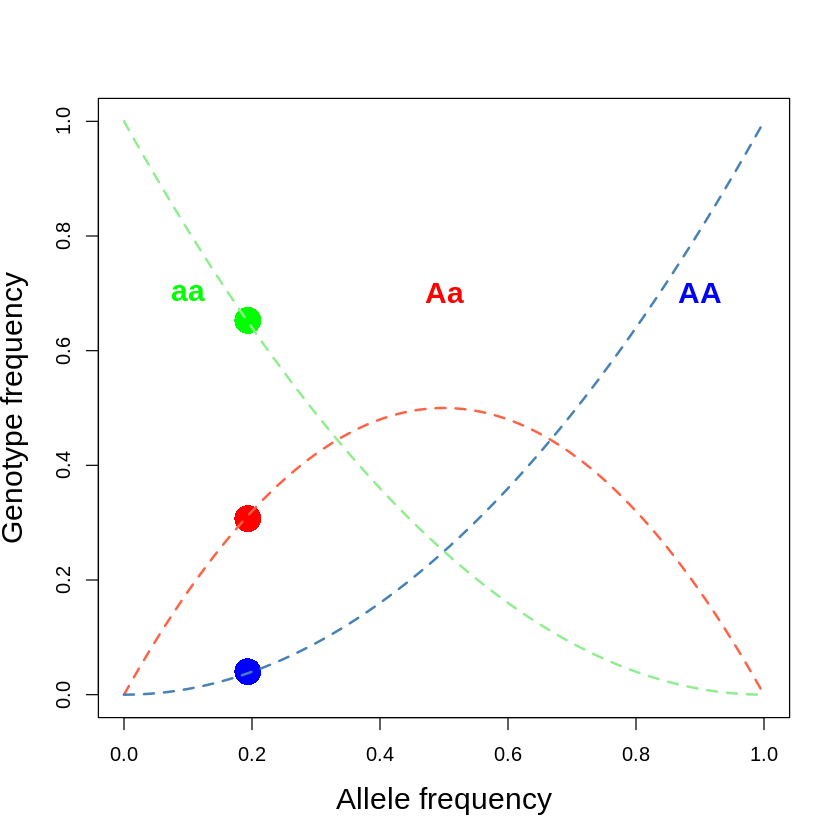

In [54]:
# Проверим их совпадение с предсказанными частотами генотипов

plot(ALEFREQ, GENFREQ["A/a"], xlab="Allele frequency", 
     ylab="Genotype frequency", ylim=c(0, 1), xlim=c(0, 1), col="red", pch=16, cex=3, cex.lab=1.5)

par(new=TRUE)

plot(ALEFREQ, GENFREQ["A/A"], axes=FALSE, xlab="", 
     ylab="", ylim=c(0, 1), xlim=c(0, 1), col="blue", pch=16, cex=3, cex.lab=1.5)

par(new=TRUE)

plot(ALEFREQ, GENFREQ["a/a"], axes=FALSE, xlab="", 
     ylab="", ylim=c(0, 1), xlim=c(0, 1), col="green", pch=16, cex=3, cex.lab=1.5)

curve(2*x*(1-x), 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="tomato", lty=2)
curve(x**2, 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="steelblue", lty=2)
curve((1-x)**2, 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="lightgreen", lty=2)
text(0.5, 0.7, "Aa", col = "red", cex= 1.5, font=2)
text(0.9, 0.7, "AA", col = "blue", cex= 1.5, font=2)
text(0.1, 0.7, "aa", col = "green", cex= 1.5, font=2)

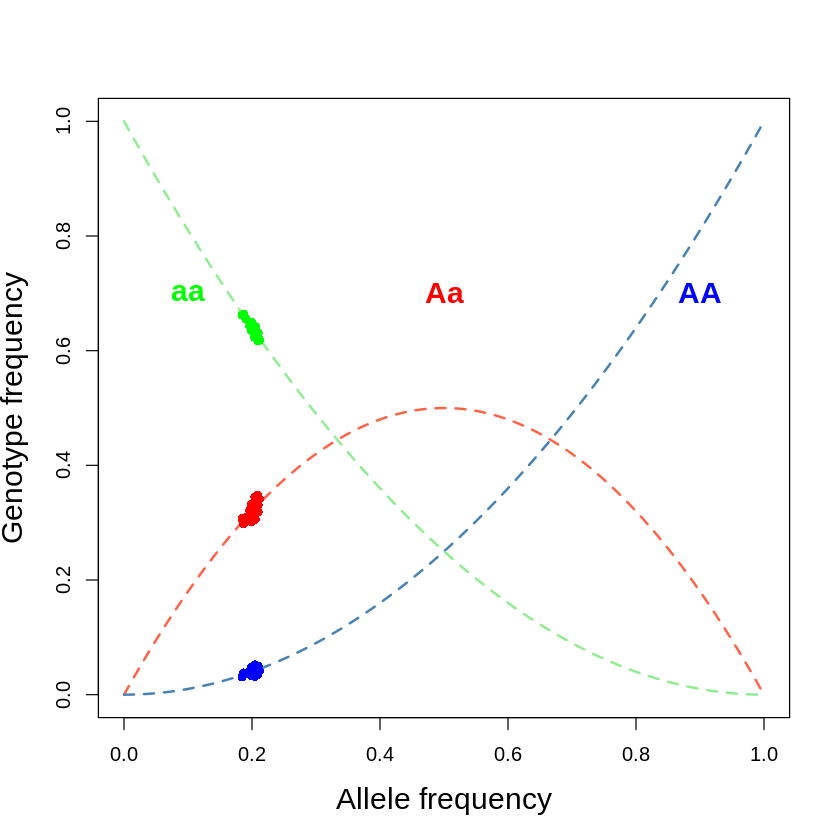

In [55]:
# Проверим не являлется ли это просто совпадением
# Сделаем репликации эксперимента

replicates = 30

plot(seq(0,1,length=9),seq(0,1,length=9), type='n',xlab="Allele frequency", ylab="Genotype frequency", ylim=c(0, 1), xlim=c(0, 1), cex.lab=1.5)
curve(2*x*(1-x), 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="tomato", lty=2)
curve(x**2, 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="steelblue", lty=2)
curve((1-x)**2, 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="lightgreen", lty=2)
text(0.5, 0.7, "Aa", col = "red", cex= 1.5, font=2)
text(0.9, 0.7, "AA", col = "blue", cex= 1.5, font=2)
text(0.1, 0.7, "aa", col = "green", cex= 1.5, font=2)

for(i in 1:replicates){
    
    for(i in 1:N){
        POPMAT[i,1] <- sample(alleles,1)
        POPMAT[i,2] <- sample(alleles,1)
    }
    
    ALECOUNT <- sum(POPMAT=='A') 
    ALEFREQ <- ALECOUNT/(N*2)
    genotypes <- apply(POPMAT,1, function(x)paste(sort(x,decreasing=TRUE),collapse="/"))
    GENCOUNT <- table(genotypes)
    GENFREQ <- GENCOUNT[sort(names(GENCOUNT),decreasing=TRUE)]/N
                       
    par(new=TRUE)
    plot(ALEFREQ, GENFREQ["A/A"], axes=FALSE, xlab="", ylab="", ylim=c(0, 1), xlim=c(0, 1), col="blue", pch=16, cex=1)

    par(new=TRUE)
    plot(ALEFREQ, GENFREQ["A/a"], axes=FALSE, xlab="", ylab="", ylim=c(0, 1), xlim=c(0, 1), col="red", pch=16, cex=1)
                       
    par(new=TRUE)
    plot(ALEFREQ, GENFREQ["a/a"], axes=FALSE, xlab="", ylab="", ylim=c(0, 1), xlim=c(0, 1), col="green", pch=16, cex=1)                   
    
}


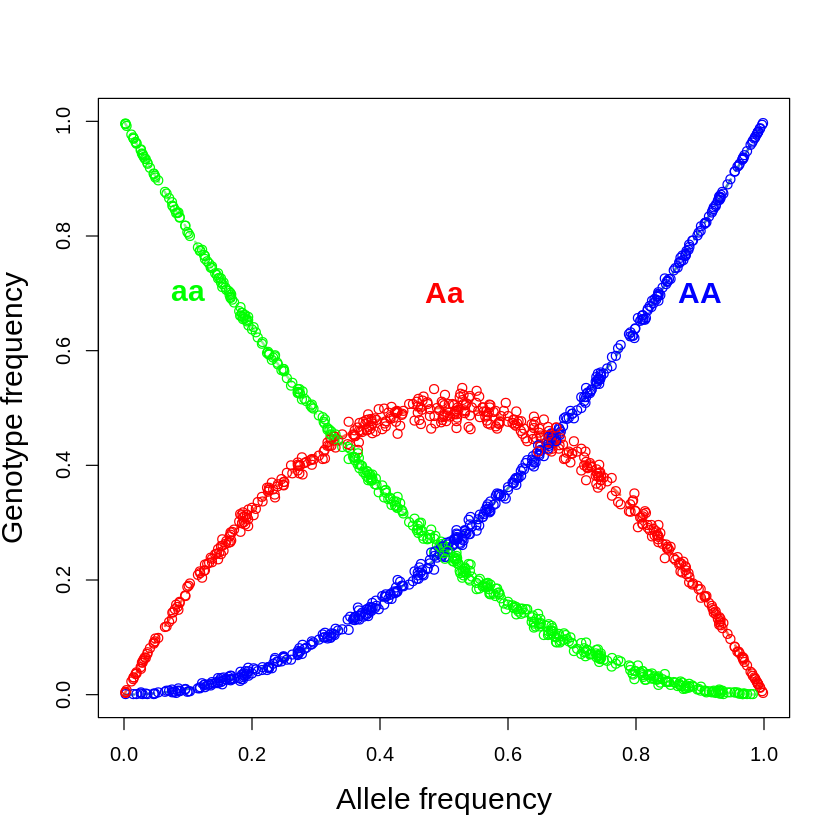

In [56]:
# А теперь попробуем смоделировать генофонд совершенно рандомных аллелей в популяции
# и представить его на графике

replicates = 500

plot(seq(0,1,length=9),seq(0,1,length=9), type='n',xlab="Allele frequency", ylab="Genotype frequency", ylim=c(0, 1), xlim=c(0, 1), cex.lab=1.5)
curve(2*x*(1-x), 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="tomato", lty=2)
curve(x**2, 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="steelblue", lty=2)
curve((1-x)**2, 0, 1, add=TRUE, ylab=NULL, lwd=2, ylim=c(0, 1), col="lightgreen", lty=2)
text(0.5, 0.7, "Aa", col = "red", cex= 1.5, font=2)
text(0.9, 0.7, "AA", col = "blue", cex= 1.5, font=2)
text(0.1, 0.7, "aa", col = "green", cex= 1.5, font=2)

for(i in 1:replicates){
    
    p <- runif(1)
    
    for(i in 1:N){        
        if(runif(1) < p){POPMAT[i,1] <- "A"}else{POPMAT[i,1] <- "a"}
        if(runif(1) < p){POPMAT[i,2] <- "A"}else{POPMAT[i,2] <- "a"}
    }
    
    ALECOUNT <- sum(POPMAT=='A') 
    ALEFREQ <- ALECOUNT/(N*2)
    genotypes <- apply(POPMAT,1, function(x)paste(sort(x,decreasing=TRUE),collapse="/"))
    GENCOUNT <- table(genotypes)
    GENFREQ <- GENCOUNT[sort(names(GENCOUNT),decreasing=TRUE)]/N
                       
    par(new=TRUE)
    plot(ALEFREQ, GENFREQ["A/A"], axes=FALSE, xlab="", ylab="", ylim=c(0, 1), xlim=c(0, 1), col="blue", pch=21, cex=1)

    par(new=TRUE)
    plot(ALEFREQ, GENFREQ["A/a"], axes=FALSE, xlab="", ylab="", ylim=c(0, 1), xlim=c(0, 1), col="red", pch=21, cex=1)
                       
    par(new=TRUE)
    plot(ALEFREQ, GENFREQ["a/a"], axes=FALSE, xlab="", ylab="", ylim=c(0, 1), xlim=c(0, 1), col="green", pch=21, cex=1)                   
    
}



***

## 5. Подсчёт аллелей на реальных данных

При анализе последовательностей обычно мы видим только частоту генотипов.
Чтобы посчитать частоту аллелей *p* диплоидного организма, используем следующую формулу:   
$p = \dfrac{2m+t}{2n}$ или $p = \dfrac{m+t/2}{n}$, где:    
*m* - частота гомозигот,   
*t* - частота гетерозигот,  
*n* - число особей

#### Таблица наблюдаемых носителей (гетерозиготы)  и больных (гомозиготы) трёх рецессивных форм заболеваний ( Lazarin et al., 2013)

CF - Муковисцидоз (Cystic fibrosis)   
SC - Серповидноклеточная анемия (Sickle cell disease)    
βt - Бета-талассемия (анемия) (β thalassemias)   

| Заболевание | Число | Гетерозиготы | Гомозиготы |
|---|---|---|---|
| CF | 23,369 | 842 | 9 |
| SC | 21,360 | 307 | 2 |
| βt | 21,096 | 158 | 1 |

In [57]:
# частота рецессивного аллеля муковисцидоза
p <- (9+842/2)/23369
p

[1] 0.01840045

In [58]:
# Ожидаемая частота гетерозигот муковисцидоза из ПХВ
2*p*(1-p)

[1] 0.03612374

In [59]:
# Наблюдаемая частота гетерозигот муковисцидоза
842/23369

[1] 0.03603064

#### Соотношение гетерозигот к гомозиготам

$$\dfrac{2p(1-p)}{p^2} = \dfrac{2(1-p)}{p}\approx\dfrac{2}{p}$$

#### Таблица сравнения ожидаемых и наблюдаемых гетерозигот

| Заболевание | *p* | Ожид He | Наблюд He |
|---|---|---|---|
| CF | 0.0184 | 0.036124 | 0.036031 |
| SC | 0.00728 | 0.014454 | 0.014373 |
| βt | 0.00380 | 0.007556 | 0.007490 |

___

## 6. Хи-квадрат тест на значимость отклонения от ПХВ

$$\chi^2=\sum{\dfrac{(E-O)^2}{E}}$$

In [60]:
# считаем вероятность нулевой гипотезы об отсутствии различий между 
# ожидаемыми (E) и наблюдаемыми (O) частотами генотипов
N = 23369

In [61]:
# ожидаемые частоты генотипов
CF_AA <- N*(1-p)^2
CF_Aa <- N*2*p*(1-p)
CF_aa <- N*p^2
print(c(CF_AA,CF_Aa,CF_aa))

[1] 22516.912191   844.175617     7.912191


In [62]:
# Считаем критерий Хи-квадрат
CF_CHI <- ((CF_AA-(23369-842-9))^2/CF_AA + (CF_Aa-842)^2/CF_Aa + (CF_aa-9)^2/CF_aa)
CF_CHI

[1] 0.1552171

In [63]:
# считаем значимость
pvalue <- pchisq(CF_CHI, df = 1, lower.tail = FALSE)
pvalue

[1] 0.6935988

### ЗАДАНИЕ 2.2

1. Проверьте значимость отклонения от ПХВ для двух остальных болезней в таблице

| Заболевание | Число | Гетерозиготы | Гомозиготы |
|---|---|---|---|
| CF | 23,369 | 842 | 9 |
| SC | 21,360 | 307 | 2 |
| βt | 21,096 | 158 | 1 |

### Ответ:

In [96]:
# Серповидноклеточная анемия (Sickle cell disease)
N = 21360

p <- (2+307/2)/N

# ожидаемые частоты генотипов
SC_AA <- N*(1-p)^2
SC_Aa <- N*2*p*(1-p)
SC_aa <- N*p^2
print('Expected genotype frequency')
print(c(SC_AA,SC_Aa,SC_aa))

# Считаем критерий Хи-квадрат
SC_CHI <- ((SC_AA-(N - 307 - 2))^2/SC_AA + (SC_Aa-307)^2/SC_Aa + (SC_aa-2)^2/SC_aa)
print('Сhi-squared test')
print(SC_CHI)

# считаем значимость
pvalue <- pchisq(SC_CHI, df = 1, lower.tail = FALSE)
print('Significance')
print(pvalue)

[1] "Expected genotype frequency"
[1] 21050.132034   308.735932     1.132034
[1] "Сhi-squared test"
[1] 0.6752928
[1] "Significance"
[1] 0.4112124


In [97]:
# Бета-талассемия (анемия) (β thalassemias)
N = 21096

p <- (1 + 158/2)/N
# ожидаемые частоты генотипов
βt_AA <- N*(1-p)^2
βt_Aa <- N*2*p*(1-p)
βt_aa <- N*p^2
print('Expected genotype frequency')
print(c(βt_AA,βt_Aa,βt_aa))

# Считаем критерий Хи-квадрат
βt_CHI <- ((βt_AA-(N-158-1))^2/βt_AA + (βt_Aa-158)^2/βt_Aa + (βt_aa-1)^2/βt_aa)
print('Сhi-squared test')
print(βt_CHI)

# считаем значимость
pvalue <- pchisq(βt_CHI, df = 1, lower.tail = FALSE)
print('Significance')
print(pvalue)

[1] "Expected genotype frequency"
[1] 20936.303375   159.393250     0.303375
[1] "Сhi-squared test"
[1] 1.611827
[1] "Significance"
[1] 0.2042352


___

## 7. Проверяем ПХВ на геномных данных

### Установка  пакета с данными (устанавливать нужно только один раз!)

In [75]:
# чтобы произвести установку, уберите # на следующей строке
install.packages("popgenr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Запуск пакета

In [76]:
library("popgenr")


Attaching package: ‘popgenr’

The following object is masked _by_ ‘.GlobalEnv’:

    genotypes



### Подгружаем SNP данные из пакеты 

In [123]:
data(snp)

In [124]:
# это одни из первых полиморфизмов, опубликованные в проекте "1000GENOMES" http://www.internationalgenome.org/
snp

ID,p,hom,het,chromosome,type
rs200000,0.364,0.1450000,0.439,5,intergenic
rs300000,0.281,0.0800000,0.403,16,intergenic
rs500000,0.381,0.1570000,0.448,8,upstream
rs600000,0.023,0.0020000,0.042,22,upstream
rs700000,0.055,0.0050000,0.099,6,intron
rs1000000,0.166,0.0270000,0.278,12,upstream
rs1100000,0.406,0.1670000,0.478,21,intron
rs1200000,0.820,0.7340000,0.171,13,regulatory
rs1300000,0.156,0.0260000,0.261,14,intron
rs1400000,0.012,0.0020000,0.020,16,intergenic


<img src="Images/annot.png" width ="700" height="700" style="float:left"/>

In [125]:
# чтобы посмотреть структуру объекта с данными, используем команду str
str(snp)

'data.frame':	25 obs. of  6 variables:
 $ ID        : Factor w/ 25 levels "rs1000000","rs1100000",..: 10 20 23 24 25 1 2 3 4 5 ...
 $ p         : num  0.364 0.281 0.381 0.023 0.055 0.166 0.406 0.82 0.156 0.012 ...
 $ hom       : num  0.145 0.08 0.157 0.002 0.005 0.027 0.167 0.734 0.026 0.002 ...
 $ het       : num  0.439 0.403 0.448 0.042 0.099 0.278 0.478 0.171 0.261 0.02 ...
 $ chromosome: int  5 16 8 22 6 12 21 13 14 16 ...
 $ type      : Factor w/ 7 levels "3UTR","downstream",..: 3 3 7 7 4 7 4 6 4 3 ...


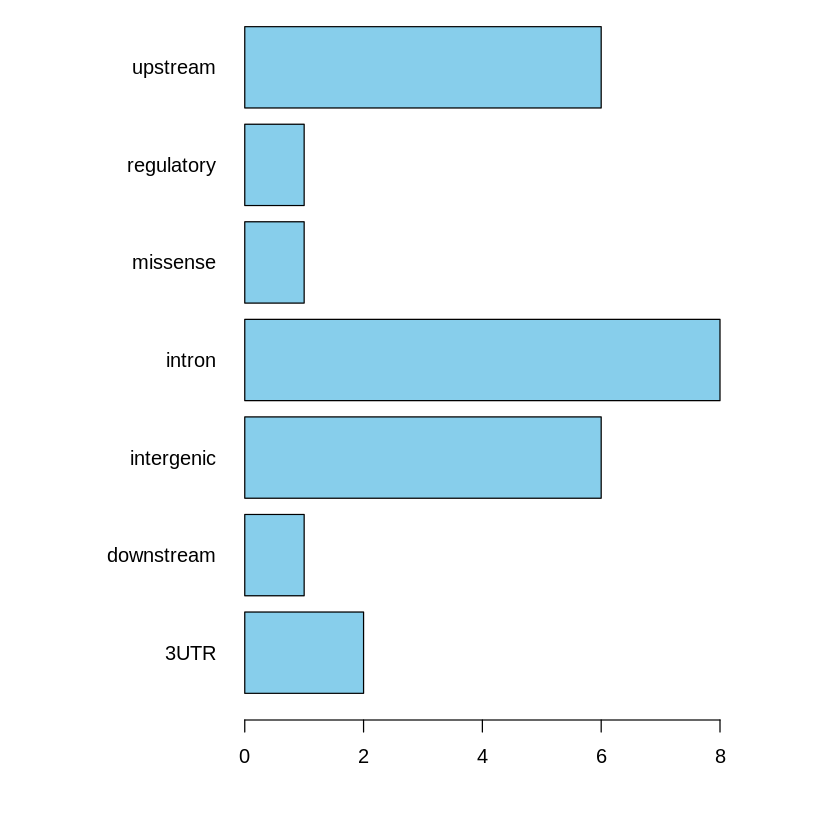

In [126]:
# смотрим число аннотаций участков где есть SNPs
par(mai=c(1,2,0,1))
plot(snp$type, horiz=TRUE, las=1, col='skyblue')

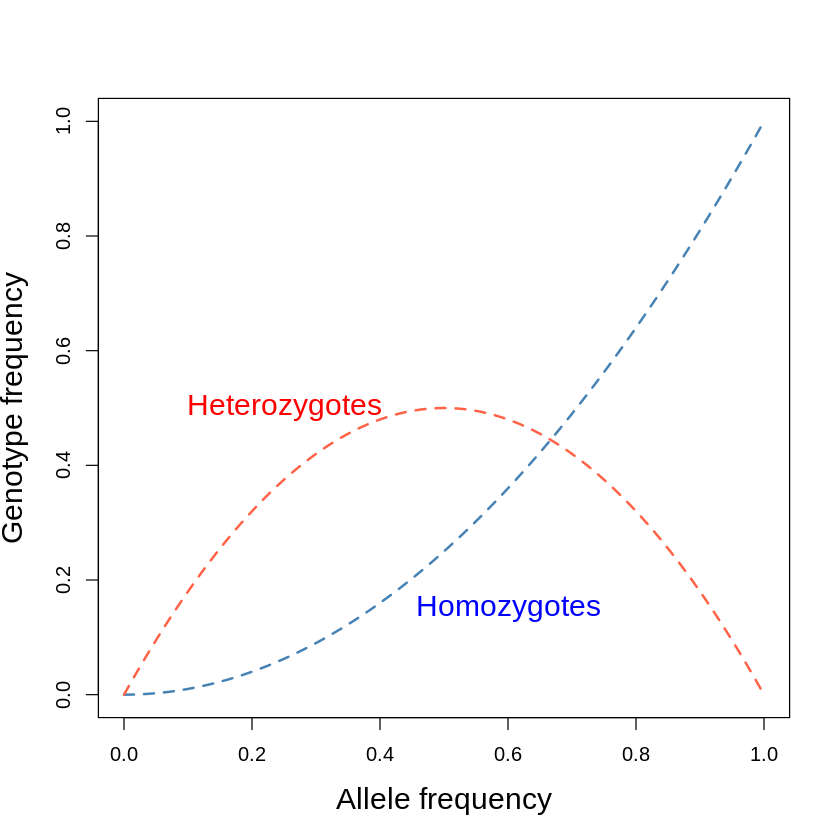

In [127]:
# смотрим соответствие частот SNP Правилу ХВ
curve(x^2, from = 0, to = 1, xlab = "Allele frequency", ylab = "Genotype frequency", lty = 2, 
      lwd=2, cex.lab=1.5, col='steelblue', xlim=c(0,1), ylim=c(0,1))
curve(2*x*(1-x), from = 0, to = 1, add=TRUE, xlab = "", ylab = "", lty = 2, 
      lwd=2, cex.lab=1.5, col='tomato', xlim=c(0,1), ylim=c(0,1))
text(0.25, 0.5, "Heterozygotes", col = 'red', cex=1.5)
text(0.6, 0.15, "Homozygotes", col = 'blue', cex=1.5)

### ЗАДАНИЕ 2.3

1. Нанесите на график, показанный выше, частоты генотипов для всех SNP
2. Проверьте значимость отклонения от ПХВ для каждого SNP у 1000 исследуемых людей
3. На каких типах геномных участков SNP подвержены наибольшему отклонению от ПХВ? Почему?

###  Ответ:

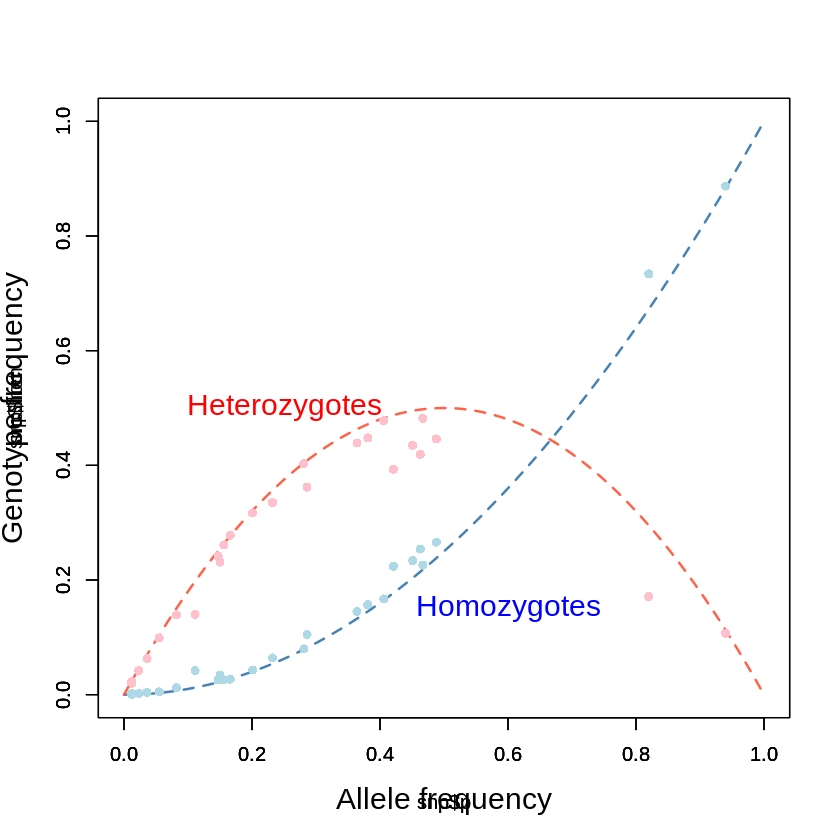

In [135]:
x <- snp$hom
curve(x^2, from = 0, to = 1, xlab = "Allele frequency", ylab = "Genotype frequency", lty = 2, 
      lwd=2, cex.lab=1.5, col='steelblue', xlim=c(0,1), ylim=c(0,1))
curve(2*x*(1-x), from = 0, to = 1, add=TRUE, xlab = "", ylab = "", lty = 2, 
      lwd=2, cex.lab=1.5, col='tomato', xlim=c(0,1), ylim=c(0,1))
text(0.25, 0.5, "Heterozygotes", col = 'red', cex=1.5)
text(0.6, 0.15, "Homozygotes", col = 'blue', cex=1.5)
par(new=TRUE)
plot(snp$p, snp$het, ylim=c(0, 1), xlim=c(0, 1), col="pink", pch=16, cex=1)
par(new=TRUE)
plot(snp$p, snp$hom, ylim=c(0, 1), xlim=c(0, 1), col="lightblue", pch=16, cex=1)
# У меня не вышло убрать лишние надписи(

In [136]:
# Подсчёт для 1000 человек
N = 1000

# ожидаемые частоты генотипов
ppl_AA <- N*(1-snp$p)^2
ppl_Aa <- N*2*snp$p*(1-snp$p)
ppl_aa <- N*(snp$p)^2
'Expected genotype frequency'
print(c(ppl_AA,ppl_Aa,ppl_aa))

# Считаем критерий Хи-квадрат
ppl_CHI <- ((ppl_AA-(1000-snp$hom-snp$het))^2/ppl_AA + (ppl_Aa-snp$het)^2/ppl_Aa + (ppl_aa-snp$het)^2/ppl_aa)
'Сhi-squared test'
ppl_CHI

# считаем значимость
pvalue <- pchisq(ppl_CHI, df = 1, lower.tail = FALSE)
'Significance'
pvalue

# Здесь где-то ошибка, потому что конкретной зависимости не видно

[1] "Expected genotype frequency"

 [1] 404.496 516.961 383.161 954.529 893.025 695.556 352.836  32.400 712.336
[10] 976.144 288.369 842.724 929.296 301.401 727.609 976.144 335.241 638.401
[19] 284.089 262.144 509.796 722.500   3.600 589.824 790.321 463.008 404.078
[28] 471.678  44.942 103.950 276.888 482.328 295.200 263.328  23.712 497.262
[37] 150.552  69.408 495.198 250.782  23.712 487.518 321.198 497.822 499.712
[46] 408.408 255.000 112.800 356.352 197.358 132.496  78.961 145.161   0.529
[55]   3.025  27.556 164.836 672.400  24.336   0.144 214.369   6.724   1.296
[64] 203.401  21.609   0.144 177.241  40.401 218.089 238.144  81.796  22.500
[73] 883.600  53.824  12.321


[1] "Сhi-squared test"

[1]   1468.73950    931.87019   1606.13178     47.46829    119.37191
 [6]    436.32298   1829.90287  29809.48475    402.55927     24.36074
[11]   2462.78424    186.01879     75.82433   2313.00055    373.19891
[16]     24.34957   1978.91209    564.74077   2514.53060   2808.90830
[21]    959.22519    382.95816 276227.39012    693.52873    264.65381

[1] "Significance"

[1] 2.430803e-321 1.158126e-204  0.000000e+00  5.590091e-12  8.682468e-28
 [6]  6.834620e-97  0.000000e+00  0.000000e+00  1.526924e-89  7.988027e-07
[11]  0.000000e+00  2.351744e-42  3.100571e-18  0.000000e+00  3.764436e-83
[16]  8.034468e-07  0.000000e+00 7.822569e-125  0.000000e+00  0.000000e+00
[21] 1.310465e-210  2.824425e-85  0.000000e+00 7.637187e-153  1.660084e-59